## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding

## Problem Statement
CineNova Studios is exploring an expansion into the film industry and aims to produce high-grossing movies similar to those created by major film studios. However, the company currently lacks experience in this domain and needs strategic direction. To inform its entry, CineNova is seeking insights into current market trends—specifically, which types of movies are generating the highest revenue.

## Objectives
i) Identify the most profitable movie genres currently dominating the box office.

ii) Evaluate key factors (e.g. genre, budget, release date) that contribute to a film’s financial success.

iii) Analyze audience reception and critical ratings to understand their influence on box office performance.

iv) Quantify the relationship between production budgets and revenue to determine optimal investment levels.

v) Assess market trends over recent years to identify emerging opportunities for new film content.

## Data Understanding
A total of 5 datasets and a database were used in the project.
bom.movie_gross.csv which has 3387 rows and 5 columns 
tmd.movies.csv which has 26,517 rows and 10 columns.
tn.movie_budgets.csv which has 5782 rows and 6 columns.
rt.movie_info.tsv which has 156o rows and 12 columns.
rt.reviews.tsv which has 54432 rows and 8 columns
im.db where genres, averagerating, numvotes were extracted from the database and converted to a dataframe with 73,856 rows and 3 columns

## Data Cleaning

In [141]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [142]:
data1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [143]:
data1.shape

(3387, 5)

In [144]:
data1.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [145]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The data types are accurate for each of the variables except for foreign_gross

In [146]:
# Create a dataframe copy to be used in data cleaning for the first data set
dataf1=data1.copy(deep=True)

In [147]:
# change data type
dataf1['foreign_gross'] = dataf1['foreign_gross'].str.replace(',', '', regex=False).astype(float)

In [148]:
dataf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [149]:
# Checking for unique values
for column in dataf1:
    unique_values = dataf1[column].unique()
    print(f"unique values in column'{column}', '\n':{unique_values}",'\n')

unique values in column'title', '
':['Toy Story 3' 'Alice in Wonderland (2010)'
 'Harry Potter and the Deathly Hallows Part 1' ... 'El Pacto' 'The Swan'
 'An Actor Prepares'] 

unique values in column'studio', '
':['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' nan 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI

In [150]:
# Drop Duplicates
dataf1=dataf1.drop_duplicates()
dataf1.shape

(3387, 5)

The dataset's shape remains the same hence no duplicates were found.

In [151]:
# Check column names
dataf1.columns


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [152]:
# Drop unneccessary columns
del dataf1["studio"]
dataf1.columns

Index(['title', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [153]:
# Check missing values
dataf1.isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

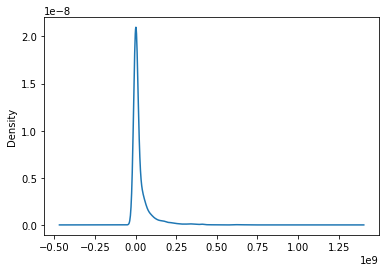

In [154]:
# Fill missing values with mean or median
dataf1['domestic_gross'].plot.kde()
plt.show()

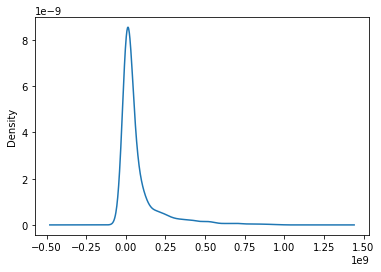

In [155]:
dataf1['foreign_gross'].plot.kde()
plt.show()

Distriution is skewed for both column, so replace the null values with the median. 

In [156]:
dataf1[['domestic_gross', 'foreign_gross']] = dataf1[['domestic_gross', 'foreign_gross']].fillna(dataf1[['domestic_gross', 'foreign_gross']].median())


In [157]:
data2 = pd.read_csv('tmdb.movies.csv')
data2.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [158]:
# Creating a copy of the data to be used in cleaning
dataf2=data2.copy(deep=True)
dataf2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [159]:
dataf2.shape

(26517, 10)

In [160]:
dataf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Observation : The data contains 26517 rows and 10 columns of which 5 are numeric columns and 5 are categorical columns

In [161]:
dataf2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26517.0,13258.000000,7654.942880,0.0,6629.0,13258.000,19887.000,26516.000
id,26517.0,295050.153260,153661.615648,27.0,157851.0,309581.000,419542.000,608444.000
popularity,26517.0,3.130912,4.355229,0.6,0.6,1.374,3.694,80.773
vote_average,26517.0,5.991281,1.852946,0.0,5.0,6.000,7.000,10.000
vote_count,26517.0,194.224837,960.961095,1.0,2.0,5.000,28.000,22186.000


In [162]:
dataf2.describe(include = 'O').T

,count,unique,top,freq
genre_ids,26517,2477,[99],3700
original_language,26517,76,en,23291
original_title,26517,24835,Eden,7
release_date,26517,3433,2010-01-01,269
title,26517,24688,Eden,7


In [163]:
# Checking for unique values
for column in dataf2:
    unique_values = dataf2[column].unique()
    print(f"unique values in column'{column}' are : '\n':{unique_values}",'\n')

unique values in column'Unnamed: 0' are : '
':[    0     1     2 ... 26514 26515 26516] 

unique values in column'genre_ids' are : '
':['[12, 14, 10751]' '[14, 12, 16, 10751]' '[12, 28, 878]' ...
 '[18, 14, 27, 878, 10749, 53]' '[16, 27, 9648]' '[10751, 12, 28]'] 

unique values in column'id' are : '
':[ 12444  10191  10138 ... 381231 366854 309885] 

unique values in column'original_language' are : '
':['en' 'nl' 'es' 'ja' 'sv' 'de' 'fr' 'cn' 'it' 'ru' 'zh' 'hi' 'no' 'ko'
 'da' 'fi' 'pl' 'te' 'hu' 'tr' 'pt' 'he' 'fa' 'th' 'cs' 'et' 'tl' 'lt'
 'xx' 'bs' 'ar' 'is' 'el' 'mr' 'hr' 'ro' 'sr' 'uk' 'nb' 'hz' 'ca' 'bg'
 'sl' 'lv' 'si' 'ab' 'ta' 'bo' 'id' 'sq' 'bn' 'gu' 'lo' 'ne' 'kk' 'hy'
 'ps' 'kn' 'vi' 'ku' 'ka' 'ml' 'ur' 'mi' 'eu' 'sn' 'cy' 'ha' 'ky' 'yi'
 'pa' 'xh' 'cr' 'sw' 'af' 'dz'] 

unique values in column'original_title' are : '
':['Harry Potter and the Deathly Hallows: Part 1' 'How to Train Your Dragon'
 'Iron Man 2' ... 'The Last One' 'Trailer Made' 'The Church'] 

unique values i

In [164]:
# checking for Duplicates
dataf2.duplicated().sum()


0

Observation : There are no duplicated rows in the dataset

In [165]:
#Checking the column names
dataf2.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [166]:
#Dropping unnecessary columns
dataf2.drop(['Unnamed: 0','genre_ids', 'id','original_language','original_title' ], axis = 1, inplace = True)
dataf2.head()

,popularity,release_date,title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186


In [167]:
# Checking for missing values
dataf2.isna().sum()

popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

Observation : There are no missing values in the dataset

end of data cleaning

### Data3 Data cleaning

In [168]:
# Reading the dataset and creating a dataframe
data3 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
data3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [169]:
# looking at first five rows
data3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [170]:
# looking at last five rows
data3.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [171]:
# shows the number of rows and columns in the dataset
data3.shape

(5782, 6)

In [172]:
# checking data dimensions(rows and columns),datatypes and its completeness
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [173]:
# checking data dimensions(rows and columns),datatypes and its completeness
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [174]:
# cheking for null values
data3.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [175]:
# Checking for concise summary and transposing it
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5782.0,50.372363,28.821076,1.0,25.0,50.0,75.0,100.0


In [176]:
# Checking for concise summary and transposing it
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5782.0,50.372363,28.821076,1.0,25.0,50.0,75.0,100.0


In [177]:
# carrying out duplicate check
data3.duplicated().sum()

0

In [178]:
# Creating a copy of the original dataset to avoid modifying the original dataset.
data3_copy = data3.copy(deep = True)
data3_copy[:5]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [179]:
# looking at columns to check for white space in columns name
data3_copy.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

#### There are no white spaces between column names and all the columns in data3 three are important for analysis and therefore none will be dropped.

In [180]:
# checking for null values in the resultant dataset
data3_copy.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### The data has no null values hence no need for those rigorous operations for fillingin the missing data

In [181]:
# checking for duplicates in the every column
data3_copy.duplicated()
data3_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [182]:
# checking for duplicates in the dataframe
data3_copy[data3_copy.duplicated()]
data3_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [183]:
# checking for unique  in every column
for clom in data3_copy:
    clom_val = data3_copy[clom].unique()
    print(f"{clom}\n{clom_val}\n")


id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

release_date
['Dec 18, 2009' 'May 20, 2011' 'Jun 7, 2019' ... 'Aug 14, 2008'
 'Feb 26, 1993' 'Jul 13, 2005']

movie
['Avatar' 'Pirates of the Caribbean: On Stranger Tides' 'Dark Phoenix' ...
 'Return to the Land of Wonders' 'A Plague So Pleasant'
 'My Date With Drew']

production_budget
['$425,000,000' '$410,600,000' '$350,000,000' '$330,600,000'
 '$317,000,000' '$306,000,000' '$300,000,000' '$275,000,000'
 '$260,000,000' '$258,000,000' '$250,000,000' '$232,000,000'
 '$230,000,000' '$225,000,000' '$220,000,000' '$217,000,000'
 '$215,000,000' '$210,000,000' '$207,000,000' '$205,000,0

In [184]:
# changing the release_date to datetime
data3_copy['release_date'] = pd.to_datetime(data3_copy['release_date'])
data3_copy['release_date']
# so extract the month and year too
data3_copy['month'] = data3_copy['release_date'].dt.month
data3_copy['year'] = data3_copy['release_date'].dt.year

In [185]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols:
    data3_copy[col] = data3_copy[col].replace('[\$,]', '', regex=True).astype(float)
data3_copy[cols].head()

,production_budget,domestic_gross,worldwide_gross
0,425000000.0,760507625.0,2.776345e+09
1,410600000.0,241063875.0,1.045664e+09
2,350000000.0,42762350.0,1.497624e+08
3,330600000.0,459005868.0,1.403014e+09
4,317000000.0,620181382.0,1.316722e+09


In [186]:
# Creating profit column for profit calculation
data3_copy['profit'] = data3_copy['worldwide_gross'] - data3_copy['production_budget']
data3_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017,9.997217e+08
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,12,2018,-7.000000e+03
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,4,1999,2.344950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,7,2005,-3.662000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,9,2015,-1.400000e+03


In [187]:
# Calculate return on investment ratio
data3_copy['return_ratio'] = data3_copy['worldwide_gross'] / data3_copy['production_budget']
data3_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,return_ratio
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009,2.351345e+09,6.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,6.350639e+08,2.546673
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,-2.002376e+08,0.427892
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,1.072414e+09,4.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017,9.997217e+08,4.153696
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,12,2018,-7.000000e+03,0.000000
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,4,1999,2.344950e+05,40.082500
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,7,2005,-3.662000e+03,0.267600
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,9,2015,-1.400000e+03,0.000000


In [188]:
data3_copy


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,return_ratio
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009,2.351345e+09,6.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,6.350639e+08,2.546673
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,-2.002376e+08,0.427892
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,1.072414e+09,4.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017,9.997217e+08,4.153696
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,12,2018,-7.000000e+03,0.000000
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,4,1999,2.344950e+05,40.082500
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,7,2005,-3.662000e+03,0.267600
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,9,2015,-1.400000e+03,0.000000


In [189]:
for clom in data3_copy.columns:
    print(f"Value counts for column: {clom}")
    print(data3_copy[clom].value_counts())
    print("\n")

Value counts for column: id
4      58
53     58
61     58
65     58
69     58
       ..
85     57
100    57
96     57
92     57
97     57
Name: id, Length: 100, dtype: int64


Value counts for column: release_date
2014-12-31    24
2015-12-31    23
2010-12-31    15
2008-12-31    14
2013-12-31    13
              ..
2018-04-27     1
1982-09-17     1
2010-02-10     1
1966-07-06     1
1977-07-13     1
Name: release_date, Length: 2418, dtype: int64


Value counts for column: movie
King Kong                     3
Halloween                     3
Home                          3
The Last House on the Left    2
The Karate Kid                2
                             ..
Dinner for Schmucks           1
Sleepover                     1
Les Visiteurs                 1
The Painted Veil              1
Gridiron Gang                 1
Name: movie, Length: 5698, dtype: int64


Value counts for column: production_budget
20000000.0     231
10000000.0     212
30000000.0     177
15000000.0     173
250000

In [190]:
data4 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')
data4.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [191]:
data4.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [192]:
data4.shape

(1560, 12)

In [193]:
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1560.0,1007.303846,579.164527,1.0,504.75,1007.5,1503.25,2000.0


In [194]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [195]:
#Create a dataframe copy to be used for data cleaning
dataf4 = data4.copy(deep=True)
dataf4.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [196]:
#check unique values in the columns
for column in dataf4:
    unique_values = dataf4[column].unique()
    print(f"unique values in column'{column}' are : '\n':{unique_values}",'\n')

unique values in column'id' are : '
':[   1    3    5 ... 1998 1999 2000] 

unique values in column'synopsis' are : '
':['This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy "Popeye" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City\'s dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier\'s right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye\'s suspicions are right -- Sal and Angie are the

# Checking duplicates and dropping all unnecessary columns

In [197]:
#drop duplicates
dataf4=dataf4.drop_duplicates()
dataf4.shape

(1560, 12)

Observation: There are no duplicates in the dataset

In [198]:
#check the columns
dataf4.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [199]:
#drop unnecessary columns
#the columns dropped were irrelevant to our analysis or had too many null values
dataf4.drop(['id','synopsis','director','writer','currency','box_office'],axis=1,inplace=True)

In [200]:
dataf4.columns

Index(['rating', 'genre', 'theater_date', 'dvd_date', 'runtime', 'studio'], dtype='object')

# Filling in null values

In [201]:
#checking the null values
dataf4.isna().sum()

rating             3
genre              8
theater_date     359
dvd_date         359
runtime           30
studio          1066
dtype: int64

# Fill in categorical variables using mode - rating, genre and studio

In [202]:
#fill in rating
rating_mode = dataf4.rating.mode()
rating_mode

0    R
dtype: object

In [203]:
dataf4['rating'].fillna(rating_mode[0],inplace=True)

In [204]:
#fill in studio
studio_mode = dataf4.studio.mode()
studio_mode

0    Universal Pictures
dtype: object

In [205]:
dataf4['studio'].fillna(studio_mode[0],inplace=True)

In [206]:
#fill in genre
dataf4['main_genre'] = dataf4['genre'].fillna('').apply(lambda x: x.split('|')[0])

In [207]:
genre_mode = dataf4.main_genre.mode()
genre_mode

0    Action and Adventure
dtype: object

In [208]:
dataf4['main_genre'].fillna(genre_mode[0],inplace=True)

In [209]:
#drop the genre column which has been replaced by main_genre
dataf4.drop(['genre'],axis=1,inplace=True)

In [210]:
#check remaining null values
dataf4.isnull().sum()

rating            0
theater_date    359
dvd_date        359
runtime          30
studio            0
main_genre        0
dtype: int64

# Fill in date values - theater date and dvd date

In [211]:
#convert column data type then forward fill the dates
dataf4['theater_date'] = pd.to_datetime(dataf4['theater_date'])
dataf4['theater_date'] = dataf4['theater_date'].ffill()

In [212]:
dataf4['dvd_date'] = pd.to_datetime(dataf4['dvd_date'])
dataf4['dvd_date'] = dataf4['dvd_date'].ffill()

# Fill in numerical variables

In [213]:
#convert the runtime to numerical vales
dataf4['runtime'] = pd.to_numeric(
    dataf4['runtime'].str.replace(' minutes', '', regex=False),
    errors='coerce'
)

<function matplotlib.pyplot.show(close=None, block=None)>

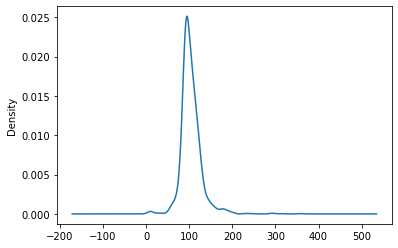

In [214]:
#check whether the data is skewed
dataf4['runtime'].plot.kde()
plt.show

In [215]:
mean_value = dataf4['runtime'].mean()
mean_value

103.96797385620916

In [216]:
#fill in the missing values in minutes
dataf4['runtime'].fillna(mean_value,inplace=True)

In [217]:
dataf4.isnull().any()

rating          False
theater_date    False
dvd_date        False
runtime         False
studio          False
main_genre      False
dtype: bool

## Cleaning Data5

In [218]:
#Reading the Data
data5 = pd.read_csv('rt.reviews.tsv', sep = '\t', encoding = 'latin -1' )
data5.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [219]:
# Check number of rows and columns
print (f"The dataset has {data5.shape[0]} rows and {data5.shape[1]} columns")

The dataset has 54432 rows and 8 columns


In [220]:
data5.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [221]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [222]:
# Create a dataframe copy to be used in data cleaning for the first data set
dataf5=data5.copy(deep=True)

In [223]:
# Check column names
dataf5.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [224]:
#Checking for the duplicates
dataf5.duplicated().sum()

9

In [225]:
#Removing the duplicates
dataf5 = dataf5.drop_duplicates()

dataf5.duplicated().sum()

0

In [226]:
print(dataf5.columns)


Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


In [227]:
#Dropping columns
dataf5.drop(['id', 'critic', 'review', 'publisher'], axis=1, inplace=True)
print(dataf5.columns)


Index(['rating', 'fresh', 'top_critic', 'date'], dtype='object')


We now have 4 columns after dropping the id. critic, review and publisher column. 

In [228]:
dataf5.isna().sum()

rating        13516
fresh             0
top_critic        0
date              0
dtype: int64

In [229]:
#1. Converting date to Datetime
dataf5['date'] = pd.to_datetime(dataf5['date'])
dataf5.head(3)

,rating,fresh,top_critic,date
0,3/5,fresh,0,2018-11-10
1,NaN,rotten,0,2018-05-23
2,NaN,fresh,0,2018-01-04


We converted date to datetime which is very useful when visualizing time trends

In [230]:
#2. top_critic;converting it to True/False 
#makes it easier to work with when plotting or modeling
dataf5['top_critic'] = dataf5['top_critic'].astype(bool)
dataf5.head(3)

,rating,fresh,top_critic,date
0,3/5,fresh,False,2018-11-10
1,NaN,rotten,False,2018-05-23
2,NaN,fresh,False,2018-01-04


In [231]:
#3. Fresh column
fresh_value_counts = dataf5['fresh'].value_counts()
print(fresh_value_counts)

#converting Fresh to a Binary
dataf5['fresh_binary'] = dataf5['fresh'].map({'fresh': 1, 'rotten': 0})
dataf5.head(3)

fresh     33032
rotten    21391
Name: fresh, dtype: int64


,rating,fresh,top_critic,date,fresh_binary
0,3/5,fresh,False,2018-11-10,1
1,NaN,rotten,False,2018-05-23,0
2,NaN,fresh,False,2018-01-04,1


In [232]:
#4. Cleaning the rating column that has null values too 

split_rating = data5['rating'].str.split('/', expand=True)

# Convert to numeric and calculate clean rating
dataf5['rating_clean'] = pd.to_numeric(split_rating[0], errors='coerce') / pd.to_numeric(split_rating[1], errors='coerce')
dataf5.head(3)

,rating,fresh,top_critic,date,fresh_binary,rating_clean
0,3/5,fresh,False,2018-11-10,1,0.6
1,NaN,rotten,False,2018-05-23,0,NaN
2,NaN,fresh,False,2018-01-04,1,NaN


In [233]:
dataf5.isna().sum()

rating          13516
fresh               0
top_critic          0
date                0
fresh_binary        0
rating_clean    20736
dtype: int64

In [234]:
#5rating_clean column
dataf5 = dataf5.dropna(subset=['rating_clean'])
dataf5.head(3)

,rating,fresh,top_critic,date,fresh_binary,rating_clean
0,3/5,fresh,False,2018-11-10,1,0.6
7,2/5,rotten,False,2013-04-21,0,0.4
12,2/4,rotten,False,2013-01-15,0,0.5


In [235]:
# Check number of rows and columns
print (f"The dataset has {dataf5.shape[0]} rows and {dataf5.shape[1]} columns")

The dataset has 33687 rows and 6 columns


* Cleaning Data 6*

In [236]:
import sqlite3

conn = sqlite3.connect('im.db')
cur = conn.cursor()

datadata = """SELECT genres, averagerating, numvotes, runtime_minutes 
FROM movie_basics 
JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id ; """


In [237]:
data6 = pd.read_sql(datadata, conn)
data6

DatabaseError: Execution failed on sql 'SELECT genres, averagerating, numvotes, runtime_minutes 
FROM movie_basics 
JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id ; ': no such table: movie_basics

In [ ]:
data6.shape

In [ ]:
data6.info()

The data type for each of the varibales is accurate.

In [ ]:
# Checking for unique values 
for column in data6:
    unique_values = data6[column].unique()
    print(f"unique values in column'{column}', '\n':{unique_values}",'\n')

In [ ]:
data6.isna().sum()

The column genres has 804 missing values which are replaced by unknowns since it has object data values.

In [ ]:
# Create a copy of data6 before cleaning
dataf6 = data6.copy(deep=True)

In [ ]:
# Replace nulls with the mode of the 'genres' column
mode_value = dataf6['genres'].mode()[0]
dataf6['genres'].fillna(mode_value, inplace=True)



In [ ]:
# check whether to use mean or median
dataf6['runtime_minutes'].plot.kde()
plt.show()

In [ ]:
dataf6['runtime_minutes'] = dataf6['runtime_minutes'].fillna(dataf6['runtime_minutes'].median())


In [ ]:
dataf6.isna().sum()# check nulls again


Since the a movie can have a combination of two or more genres. For example,:"Family, Western" , we have to assume the first genre is the main one.

In [ ]:
#select the first genre
dataf6['main_genre'] = dataf6['genres'].apply(lambda x: x.split(',')[0])


In [ ]:
for column in dataf6:
    unique_values = dataf6[column].unique()
    print(f"unique values in column'{column}', '\n':{unique_values}",'\n')

In [ ]:
# Now delete the genres column
del dataf6["genres"]

In [ ]:
# Check for negative values in 'runtime'
negative_runtimes = dataf6[dataf6['runtime_minutes'] < 0]

# Display the result
print(negative_runtimes)


## Exploratory Data Analysis

In [ ]:
## Data1

## Dataf2 EDA

In [238]:
dataf2.head()

,popularity,release_date,title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186


### Univriate Analysis

### 1. Popularity

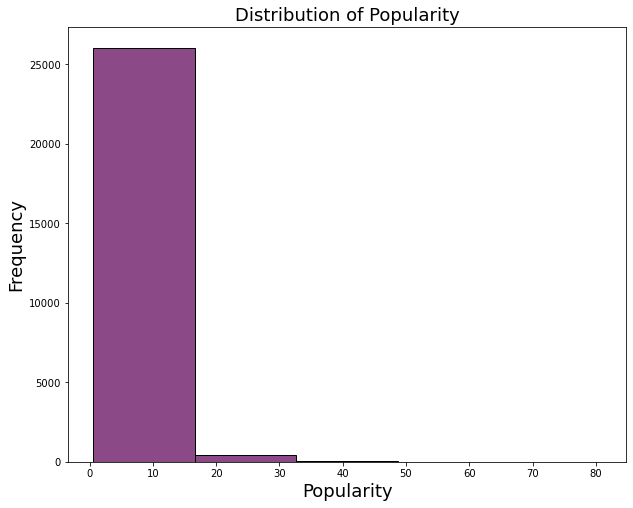

In [239]:
#plotting a histogram for popularity column
plt.figure(figsize=(10, 8))
sns.histplot(data=dataf2, x='popularity', bins=5, color="#640D5F")
plt.title('Distribution of Popularity', fontsize=18)
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()


Observations: 


* The popularity scores are heavily right skewed with concentration on the lower end between 0 and 20.


* A few movies have popularity scores above 50, some reaching as high as 80 and above. These are likely major global hits, possibly recent releases or part of big franchises (like Marvel or Avatar).

In [240]:
### 2. Vote_Average

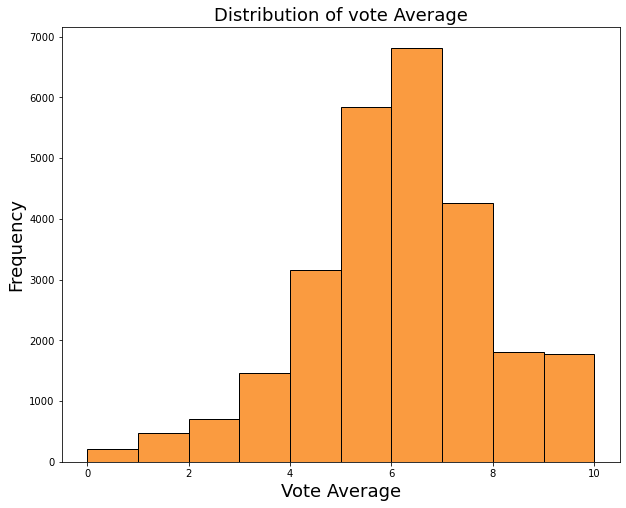

In [241]:
#plotting a histogram for vote_average column
plt.figure(figsize=(10, 8))
sns.histplot(data=dataf2, x='vote_average', bins=10, color="#F97A00")
plt.title('Distribution of vote Average', fontsize=18)
plt.xlabel('Vote Average', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

Observations: Most of the movies had an average vote of 5 and 6 thereby suggesting most of the movies were rated as average

### 3. Vote_Count

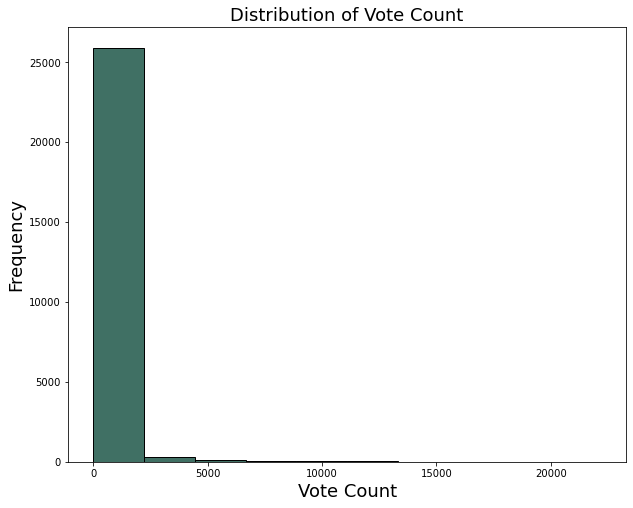

In [242]:
#plotting a histogram for vote_count column
plt.figure(figsize=(10, 8))
sns.histplot(data=dataf2, x='vote_count', bins=10, color="#004030")
plt.title('Distribution of Vote Count', fontsize=18)
plt.xlabel('Vote Count', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

Observations: The Plot indicates that many movies had very little vote counts suggesting their popularity was low

In [243]:
# Converting the release_date to datetime
dataf2['release_date'] = pd.to_datetime(dataf2['release_date'])


In [244]:
# Extracting the years
dataf2['release_year'] = dataf2['release_date'].dt.year

In [245]:
# Checking the columns for change
dataf2.head()

,popularity,release_date,title,vote_average,vote_count,release_year
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,27.920,2010-07-16,Inception,8.3,22186,2010


### Bivariate Analysis

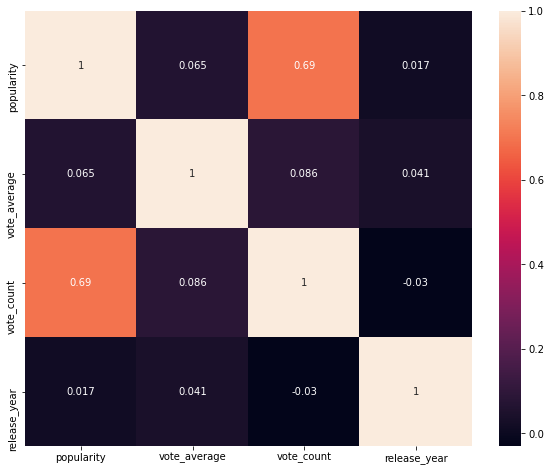

In [246]:
# Plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(dataf2[['popularity', 'vote_average', 'vote_count', 'release_year']].corr(), annot=True);

Observations: 
    
The heatmap shows the correlation between the numeric variables whereby they are weakly positive correlated with each other meaning an increase in one variable with cause a slight increase in the other variable but not noticable


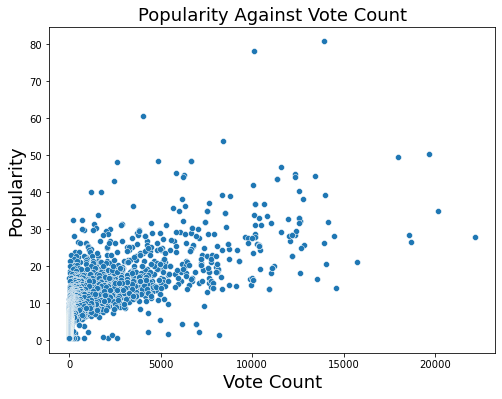

In [247]:
# Creating a scatterplot to pair vote_count and popularity
plt.figure(figsize =(8,6))
sns.scatterplot(x='vote_count', y='popularity', data=dataf2)
plt.title('Popularity Against Vote Count', fontsize=18)
plt.xlabel('Vote Count', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.show();

Observations: 

There is a positive correlation between vote count and popularity whereby movies with higher vote count tend to have higher popularity.

Some have high popularity despite low vote counts, which could indicate recent releases or viral content.


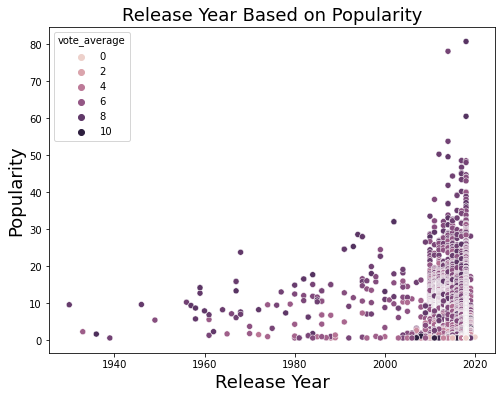

In [248]:
#Creating a coloured scatterplot for popularity overtime by vote_average
plt.figure(figsize =(8,6))
sns.scatterplot(x='release_year', y='popularity', hue='vote_average', data=dataf2)
plt.title('Release Year Based on Popularity', fontsize=18)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.show();

Observations: 

There's a clear increase in both the number of movies and their popularity after the year 2000. This could reflect the rise of digital platforms, global distribution, and social media influence.


Movies released in the 2010s and beyond show notably higher popularity scores, suggesting a shift in audience engagement or marketing strategies.

The darker purple points represent movies with higher vote averages. These are scattered throughout the timeline but tend to cluster more in recent years.


In [249]:
# Creating a variable for the top ten movies based on popularity
top_movies = dataf2.sort_values(by='popularity', ascending=False).head(10)

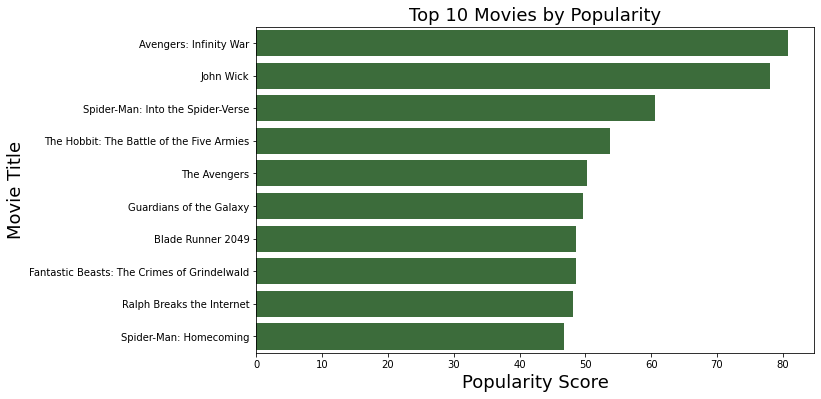

In [250]:
#Plotting the top ten movies based on popularity
top_movies = dataf2.sort_values(by='popularity', ascending=False).head(11)
plt.figure(figsize=(10,6))
sns.barplot(x='popularity', y='title', data=top_movies, color = '#347433')
plt.title('Top 10 Movies by Popularity', fontsize=18)
plt.xlabel('Popularity Score', fontsize=18)
plt.ylabel('Movie Title', fontsize=18)
plt.show()


Observations:  

The Marvel Universe is heavily represented with Avengers: Infinity War, The Avengers, Guardians of the Galaxy, and Spider-Man: Homecoming all make the list.This suggests Marvel’s consistent ability to attract large audiences and maintain high popularity.


In [251]:
# Creating a variable for the top ten movies based on vote_count
top_voted_movies = dataf2.sort_values(by='vote_count', ascending=False).head(10)

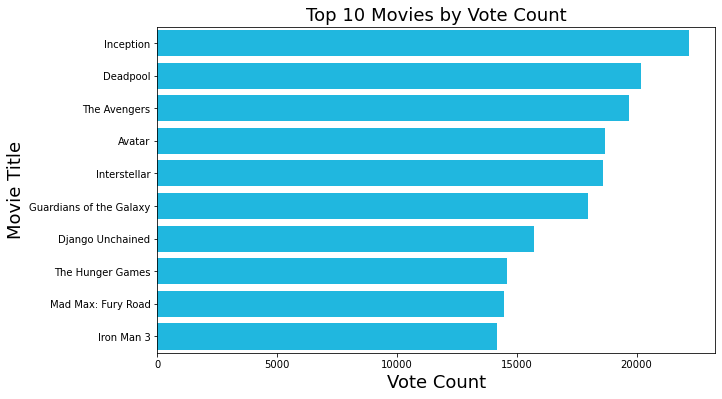

In [252]:
#Plotting the top ten movies based on vote_count
plt.figure(figsize=(10,6))
sns.barplot(x='vote_count', y='title', data=top_voted_movies, color = '#00CAFF')
plt.title('Top 10 Movies by Vote Count',fontsize=18)
plt.xlabel('Vote Count',fontsize=18)
plt.ylabel('Movie Title',fontsize=18)
plt.show()


Observations :
    
High vote counts suggest not just popularity but also viewer willingness to rate, which may correlate with strong emotional impact or cultural relevance. These movies likely benefited from wide releases, franchise power, and critical acclaim.


In [253]:
# Creating a variable for the top ten movies based on vote_average
top_rated_movies = dataf2.sort_values(by='vote_average', ascending=False).head(10)

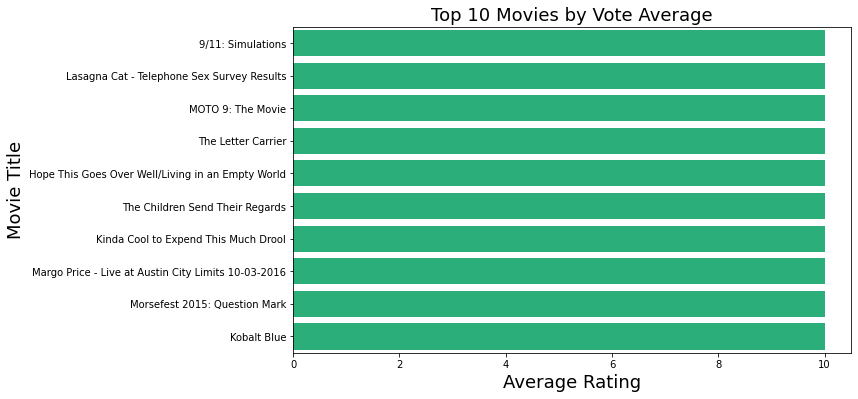

In [254]:
#Plotting the top ten movies based on vote_average
plt.figure(figsize=(10,6))
sns.barplot(x='vote_average', y='title', data=top_rated_movies, color = '#16C47F')
plt.title('Top 10 Movies by Vote Average',fontsize=18)
plt.xlabel('Average Rating',fontsize=18)
plt.ylabel('Movie Title',fontsize=18)
plt.show()


Observations:

All ten movies have an average rating of 10, indicating perfect scores from viewers. This is highly unusual and suggests either niche audiences or limited vote counts. The fact that all movies have a rating of 10 suggests low vote counts (possibly only a few ratings), bias from fan communities or creators and limited exposure, making them less likely to receive mixed reviews.



### Multivariate Analysis

In [255]:
# Normalizing the columns to put all the three metrics on one scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataf2[['popularity_norm', 'vote_count_norm', 'vote_average_norm']] = scaler.fit_transform(
    dataf2[['popularity', 'vote_count', 'vote_average']]
)


In [256]:
# Creating a composite score
dataf2['combined_score'] = (
    dataf2['popularity_norm'] +
    dataf2['vote_count_norm'] +
    dataf2['vote_average_norm']
)


In [257]:
# Creating a variable that sorts the combined score
top_combined = dataf2.sort_values(by='combined_score', ascending=False).head(10)

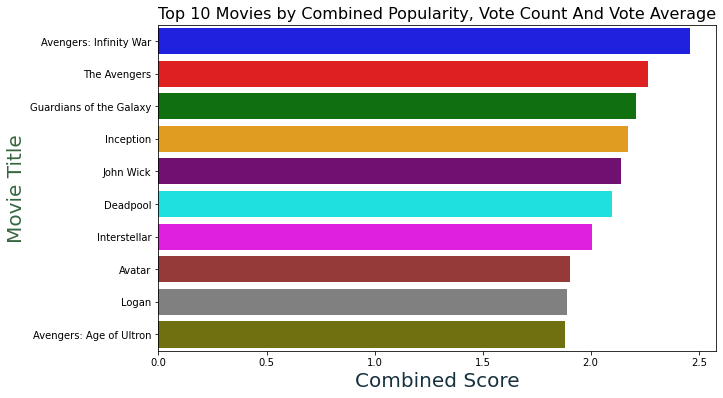

In [258]:
# Plotting based on the combined score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(10,6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'gray', 'olive']
sns.barplot(x='combined_score', y='title', data=top_combined, palette = colors)
plt.title('Top 10 Movies by Combined Popularity, Vote Count And Vote Average', fontsize =16)
plt.xlabel('Combined Score',color = '#17313E', fontsize =20)
plt.ylabel('Movie Title', color = '#386641', fontsize =20)
plt.show()


Observations: 

* Avengers Infinity War ranks highest in the combined score metric, indicating it is the most well-rounded in terms of popularity, vote count, and average rating.


* Strong Marvel Presence: Marvel dominates the list with five movies with Avengers Infinity War,The Avengers, Guardians of the Galaxy, Deadpool and Avengers Age of Ultron.


* Diversity in Genre: The top movies span multiple genres: 

    Superhero/Action: Avengers series, Deadpool, Logan

    Sci-Fi: Interstellar, Avatar
    
    Action/Thriller: John Wick

    Sci-Fi/Thriller: Inception





## Data 3 Exporatory Data Analysis

In [259]:
data3_copy.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,return_ratio
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009,2.351345e+09,6.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,6.350639e+08,2.546673
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,-2.002376e+08,0.427892
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,1.072414e+09,4.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017,9.997217e+08,4.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,12,2015,1.747311e+09,6.710167
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,1.748134e+09,6.827114
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,5,2007,6.634204e+08,3.211401
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,3.559452e+08,2.186484
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,11,2015,5.796209e+08,2.932070


### 1.0 Univariate Analysis

#### Assess market trends over recent years to identify emerging opportunities for new film content.

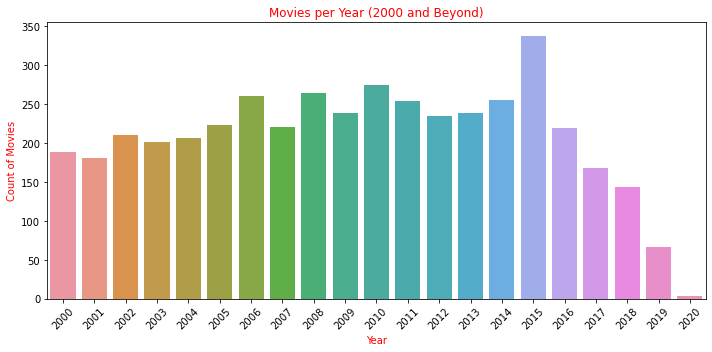

In [260]:
# Plot count of movies per year
plt.figure(figsize=(10, 5))
sns.countplot(data=data3_copy[data3_copy['year'] >= 2000], x='year')
plt.title("Movies per Year (2000 and Beyond)", color="red")
plt.xlabel("Year", color="red")
plt.ylabel("Count of Movies", color="red")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observations 

There is a general upward trend in the number of films released between 2000 and the late 2010s, indicating a growing and active film industry.

Peak activity may be observed around the mid- to late-2010s, where the count of movies per year reaches its highest point.

A notable decline in the number of movies released is visible around 2020, likely due to the COVID-19 pandemic, which caused global production delays and theater shutdowns.

After 2020, the trend may begin to recover, suggesting a rebound in production activity as the industry adapted to post-pandemic conditions and streaming demand.

### 2.0 Bivariate Analysis

#### Evaluate key factors (e.g. budget, release date) that contribute to a film’s financial success.

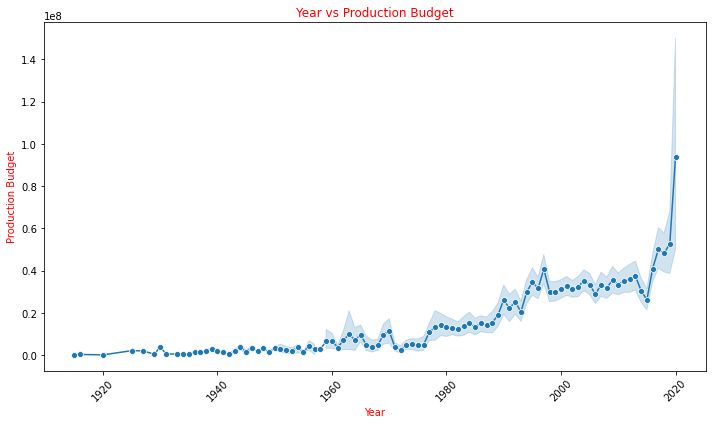

In [261]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=data3_copy, x='year', y='production_budget', marker='o')
plt.title('Year vs Production Budget', color="red")
plt.xlabel('Year', color="red")
plt.ylabel('Production Budget', color="red")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations

This plot shows how average production budgets changed years.

The line plot shows a general upward trend in production budgets over the years, indicating increased investment in film production. A noticeable dip around 2020 likely corresponds to the impact of the COVID-19 pandemic, which caused delays, shutdowns, and reduced studio output. Overall, the trend suggests that studios have become more willing to allocate larger budgets, potentially to attract larger audiences and compete in a crowded global market.

### 2.1 Bivariate Analysis

####  Quantify the relationship between production budgets and revenue to determine optimal investment levels.


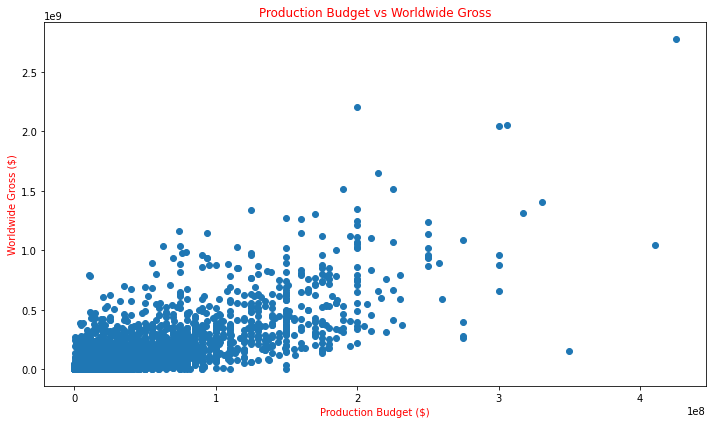

In [262]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data3_copy['production_budget'], data3_copy['worldwide_gross'])
plt.title('Production Budget vs Worldwide Gross', color="red")
plt.xlabel('Production Budget ($)', color="red")
plt.ylabel('Worldwide Gross ($)', color="red")
plt.tight_layout()
plt.show()

In [263]:
correlation = data3_copy['production_budget'].corr(data3_copy['worldwide_gross'])
print(f"Correlation: {correlation:.2f}")

Correlation: 0.75


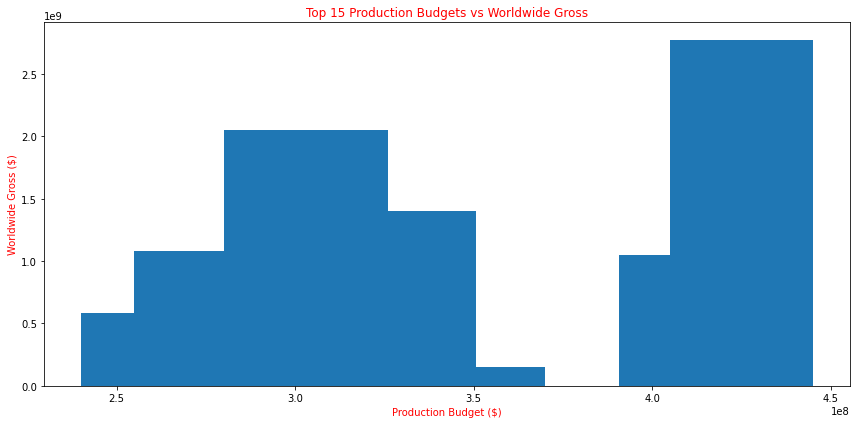

In [264]:
# Sort by budget
top_budgets = data3_copy[['production_budget', 'worldwide_gross']].sort_values(by='production_budget', ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_budgets['production_budget'], top_budgets['worldwide_gross'], width=4e7)
plt.title('Top 15 Production Budgets vs Worldwide Gross', color="red")
plt.xlabel('Production Budget ($)', color="red")
plt.ylabel('Worldwide Gross ($)', color="red")
plt.tight_layout()
plt.show()

### Observations

The scatter plot displays the relationship between production budget and worldwide gross revenue.

There is a strong positive trend, meaning films with higher production budgets generally achieve higher worldwide gross earnings.

However, the spread of points suggests some high-budget films underperform, while a few low-budget films earn high returns, though they are rare.

This indicates that while a large budget can improve box office potential, it does not guarantee success.

The relationship appears non-linear—returns don't increase at a fixed rate with budget; at some point, diminishing returns may occur.

### 3.1 Multivariate analysis

#### Quantify the relationship between production budgets and revenue to determine optimal investment levels.

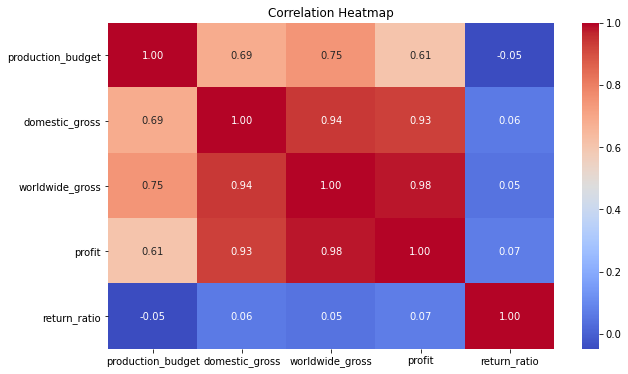

In [265]:
# Heatmap of correlation
plt.figure(figsize=(10, 6))
sns.heatmap(data3_copy[['production_budget', 'domestic_gross', 'worldwide_gross', 'profit', 'return_ratio']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### observations

The correlation heatmap provides insight into how different financial variables relate to one another.

Production budget has a strong positive correlation with both worldwide_gross and domestic_gross, indicating that higher investment tends to result in higher revenues.

Profit also shows a strong positive correlation with both worldwide_gross and domestic_gross, as expected—since revenue drives profit.

Return ratio (profit relative to budget) is moderately correlated with revenue and profit, but may show a weaker correlation with production_budget, suggesting that higher spending doesn't always guarantee proportionally higher returns.

Notably, production_budget may have a low or even negative correlation with return_ratio, implying that lower-budget films can sometimes yield better returns on investment.

## EDA DATA 4

This analysis focused on Objective 2: evaluating key factors such as genre, runtime and movie rating that contribute to a film’s popularity and financial success.

## Univariate Analysis

### 1. Movie ratings i.e. restricted, not rated, parental guidance suggested, parents strongly cautioned, general audiences, adults only

In [266]:
rating_count = dataf4["rating"].value_counts()
rating_count

R        524
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

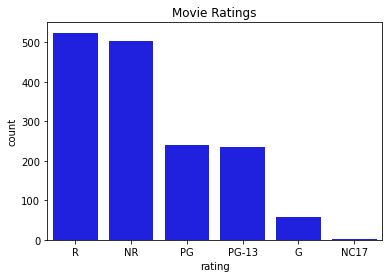

In [267]:
sns.countplot(x=dataf4["rating"],color="b")
plt.title("Movie Ratings")
plt.show()

The majority of movies in this dataset are rated 'Restricted,' followed by those labeled 'Not Rated'."

### 2. Genres

In [268]:
main_genrec = dataf4["main_genre"].value_counts().head(10).index
main_genrec

Index(['Action and Adventure', 'Comedy', 'Drama',
       'Art House and International', 'Classics', 'Horror', 'Documentary',
       'Animation', 'Mystery and Suspense', ''],
      dtype='object')

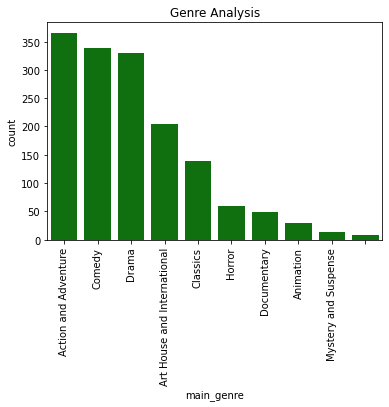

In [269]:
sns.countplot(x=dataf4["main_genre"],color="g",order=main_genrec)
plt.title("Genre Analysis")
plt.xticks(rotation=90)
plt.show()

The most popular genres in this dataset are 'Action and Adventure,' 'Comedy,' and 'Drama'."

## Bivariate Analysis

### 1. Ratings per Genre

In [270]:
#average rating by genre with not rated as 0, general audiences as 1 and adults only as 5.
rating_map = {'NR': 0, 'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4, 'NC-17': 5}
dataf4['rating_num'] = dataf4['rating'].map(rating_map)

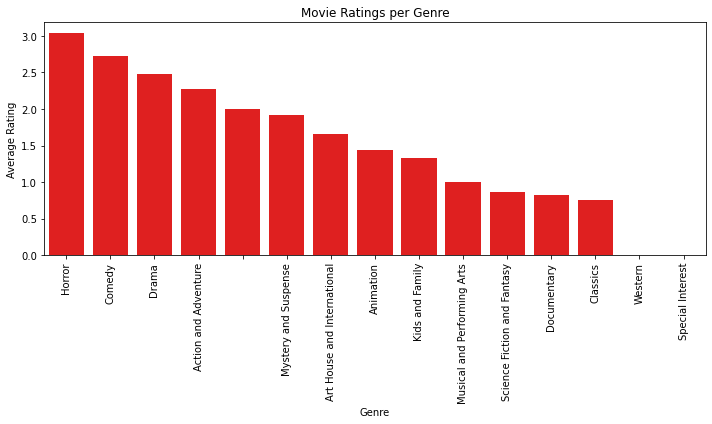

In [271]:
avg_rating_by_genre = dataf4.groupby('main_genre')['rating_num'].mean().sort_values(ascending=False)

# Plot average ratings
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, color='r')
plt.title('Movie Ratings per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The most popular genres in the dataset tend to have average movie ratings between 2 and 3 on the defined scale (where PG is 2 and PG-13 is 3). This suggests that audiences generally prefer films with moderate content restrictions specifically those rated PG or PG-13 indicating a broader appeal to both younger and older viewers, as opposed to more restrictive ratings like R or NC-17.

### 2. Runtime per genre

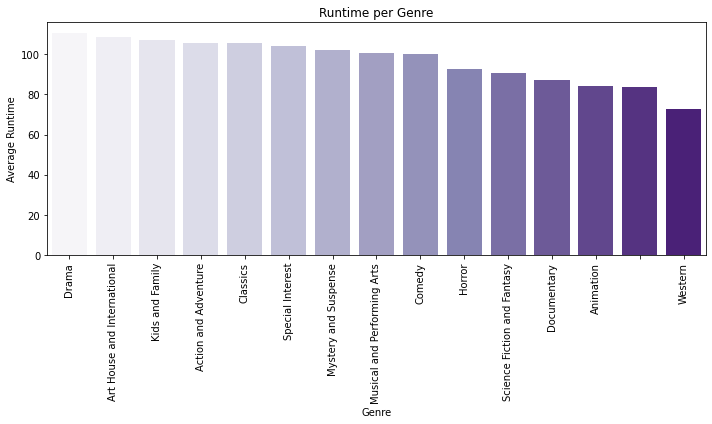

In [272]:
# Calculate average runtime per genre
avg_runtime_by_genre = dataf4.groupby('main_genre')['runtime'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_runtime_by_genre.index, y=avg_runtime_by_genre.values, palette='Purples')
plt.title('Runtime per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Runtime')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The most popular genres in the dataset consistently feature films with runtimes exceeding 100 minutes. This pattern indicates a potential audience preference for longer movies, which may be attributed to their ability to deliver deeper storytelling and a more immersive cinematic experience.

## Summary of Observations:

The most popular genres in the dataset tend to have average movie ratings between 2 and 3 on the defined scale—corresponding to PG and PG-13. This indicates that audiences generally favor films with moderate content restrictions, which are accessible to a wider demographic, appealing to both younger and older viewers. In contrast, more restrictive ratings such as R or NC-17 appear less favored within these genres.

Additionally, these popular genres consistently feature films with runtimes exceeding 100 minutes. This trend suggests a preference among audiences for longer movies, potentially due to their capacity for deeper storytelling, richer character development, and a more immersive cinematic experience.

In [273]:
## Data 5

#### Objective:Analyze audience reception and critical ratings to understand their influence on box office performance


This analysis will investigate how critical reviews from top critics affect a film’s perceived success and its potential box office performance. We will analyze ratings and review classifications. 

The main areas of focus include
1.Comparative Rating Analysis: Evaluating whether top critics (top_critic) tend to give higher or lower ratings (rating_clean) compared to non-top critics.
2.Sentiment Distribution:Analyzing the share of positive vs. negative reviews using the fresh_binary column to understand overall reception trends.
3. Temporal Trends: Exploring how audience and critic sentiments have changed over time using the date column.

Through these insights, we will assess whether films with favorable critical reception, particularly from top critics, show characteristics that could influence their commercial success.


### Univariate Analysis

#### 1. Top Critic

In [274]:
#top_critic Value Counts
dataf5["top_critic"].value_counts()

False    27119
True      6568
Name: top_critic, dtype: int64

AttributeError: 'Rectangle' object has no property 'legend'

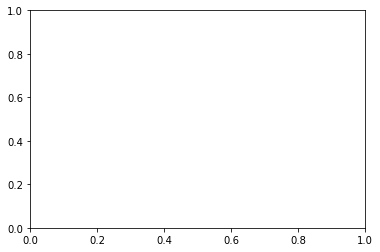

In [275]:
custom_palette = {True: '#8A0000', False: '#3A59D1'}

ax=sns.countplot(x='top_critic', data=dataf5, hue='top_critic', palette=custom_palette, legend=False)

plt.title('A Bar Graph of the Top Critics')
plt.xlabel('Top Critic (True/False)')
plt.ylabel('Critic Count')
for i in ax.containers:
    ax.bar_label(i)
plt.show()


The bar graph reveals that non-top critics(False) contributed 27,119 reviews, whereas top critics (True) wrote 6,568 reviews. This indicates that the majority of reviews come from non-top critics. The disparity suggests that top critics may be fewer in number or more selective about the movies they review.

#### 2. Date

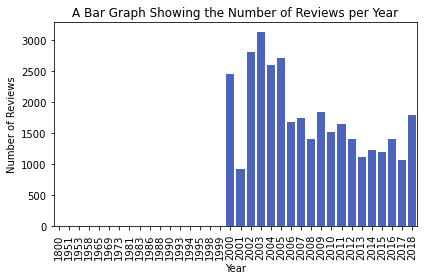

In [276]:
dataf5['year'] = dataf5['date'].dt.year

sns.countplot(x='year', data=dataf5, color="#3A59D1")
plt.xticks(rotation=90)
plt.title('A Bar Graph Showing the Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

The bar chart shows that the number of reviews peaked around 2003, with the most reviews between 1999 and 2005. There is a general decline in reviews from 2006 to 2018. This suggests that most reviews in the dataset come from the early 2000s, possibly due to increased movie production or better data availability during that period.

#### 3.Fresh Binary

In [277]:
#fresh_binary Value Counts
dataf5["fresh_binary"].value_counts()

1    20450
0    13237
Name: fresh_binary, dtype: int64

AttributeError: 'Rectangle' object has no property 'legend'

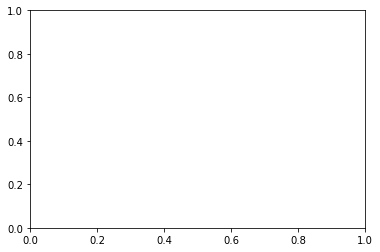

In [278]:
custom_palette = {0: '#640D5F', 1: '#8A0000'}  
ax = sns.countplot(x='fresh_binary', hue='fresh_binary', data=dataf5,
                   palette=custom_palette, legend=False)
ax.bar_label(ax.containers[0])
plt.title('A Bar Graph of Fresh vs Rotten Reviews')
plt.xlabel('Review Type (1 = Fresh, 0 = Rotten)')
plt.ylabel('Number of Reviews')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Out of the 33,687 reviews, 20450 (60.7%) were fresh, showing that a majority of critics gave positive feedback on the films. In contrast, 13237 reviews(39.3%) were negative (rotten). This trend indicates a generally favorable critical reception, which could enhance public perception and boost box office performance.

#### 4. Rating Clean

In [279]:
#value counts for rating_clean
dataf5['rating_clean'].value_counts()

0.60    4813
0.80    4187
0.50    4079
0.75    3664
0.40    3421
        ... 
1.25       1
0.32       1
0.54       1
0.44       1
0.41       1
Name: rating_clean, Length: 72, dtype: int64

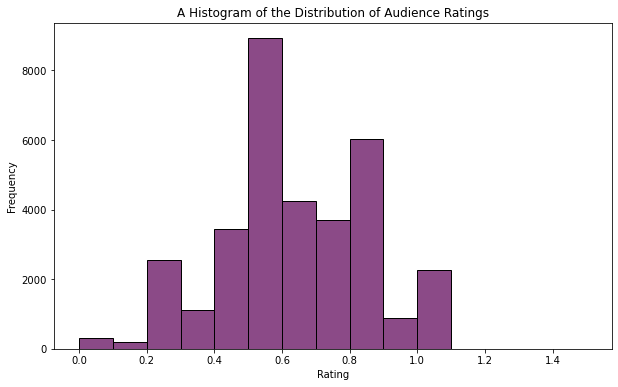

In [280]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataf5, x='rating_clean', bins=15, color="#640D5F")

plt.title('A Histogram of the Distribution of Audience Ratings', fontsize=12)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most audience ratings fall between 0.5 and 0.6 which is the highest peak. This output shows that viewers generally gave moderate to high ratings, indicating overall satisfaction. Extremely low and high ratings are rare, with values like 0.05 or 0.23 appearing only once. The distribution is positively skewed, meaning more people rated films favorably than negatively. 

### Bivariate Analysis

##### Fresh_Binary Versus Rating_Clean

In [281]:
value_count = dataf5.groupby(['fresh_binary', 'rating_clean']).size().reset_index(name='count')
value_count 

,fresh_binary,rating_clean,count
0,0,0.000,298
1,0,0.050,1
2,0,0.100,80
3,0,0.125,99
4,0,0.150,3
...,...,...,...
84,1,0.960,1
85,1,1.000,2254
86,1,1.050,6
87,1,1.100,4


TypeError: boxplot() got an unexpected keyword argument 'legend'

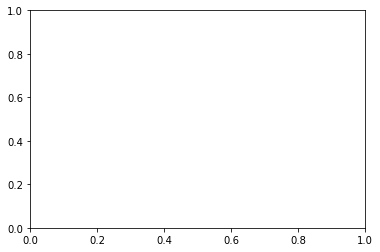

In [289]:
custom_palette = {0: '#640D5F', 1: '#8A0000'}  
sns.boxplot(x='fresh_binary', y='rating_clean', data=dataf5, hue='fresh_binary', palette=custom_palette, legend=False)
plt.title('A Boxplot of the Audience Ratings by Freshness')
plt.xlabel('Fresh (1) vs Not Fresh (0)')
plt.ylabel('Audience Rating')
plt.show()

The boxplots compare audience ratings between fresh (1) and not fresh (0) movies, based on a binary freshness indicator.  The movies that were rated “fresh” received higher audience ratings on average. The spread of ratings for fresh movies is wider but still skewed towards higher ratings. Not fresh movies are more consistently rated lower, with a tighter distribution around the median. The presence of outliers suggests variability in both groups.

In summary, freshness correlates with better audience reception.

Date Versus Rating-Clean

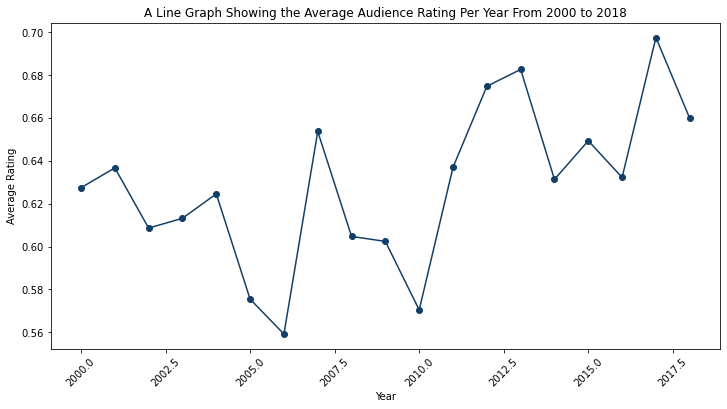

In [284]:
# Extracting the year
dataf5['year'] = dataf5['date'].dt.year

# Filter from year 2000 onwards
filtered_data = dataf5[dataf5['year'] >= 2000]

# Group by year and calculate average rating
average_rating_2000_onwards = filtered_data.groupby('year')['rating_clean'].mean()

average_rating_2000_onwards.plot(kind='line', marker='o', figsize=(12,6), color='#113F67')
plt.title('A Line Graph Showing the Average Audience Rating Per Year From 2000 to 2018')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

The line graph shows upward trend in audience ratings from 2010 to 2018 suggests growing viewer satisfaction, which likely contributed to stronger box office performance during those years. This shows that positive audience reception is a key driver of commercial success. 

Periods with lower rating for instance 2006 and 2010 may reflect weaker box office outcomes, reinforcing the influence of audience sentiment on financial performance.

 Top_critic vs rating_clean

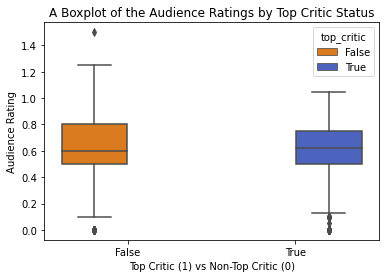

In [285]:
custom_palette = {True: '#3A59D1', False: '#F97A00'}  

sns.boxplot(x='top_critic', y='rating_clean', data=dataf5, hue='top_critic', palette=custom_palette)
plt.title('A Boxplot of the Audience Ratings by Top Critic Status')
plt.xlabel('Top Critic (1) vs Non-Top Critic (0)')
plt.ylabel('Audience Rating')
plt.show()

### Multivariate Analysis

Time Verses Freshness Verses Average Rating

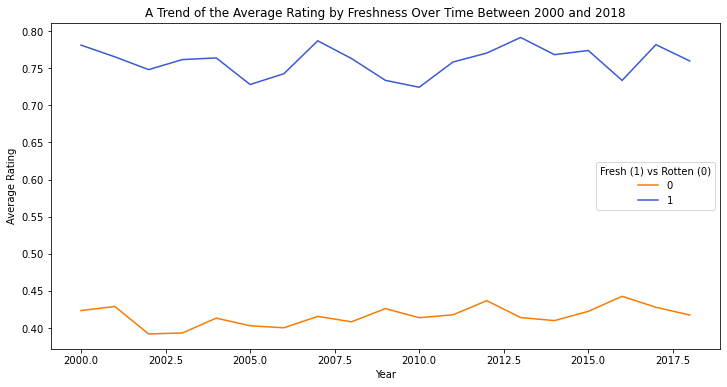

In [286]:
#Extracting the year
dataf5['year'] = dataf5['date'].dt.year

# Filtering for Year 2000 onwards
df_filtered = dataf5[dataf5['year'] >= 2000]

#Grouping by year and freshness and getting the average rating
Multivariate1 = df_filtered.groupby(['year', 'fresh_binary'])['rating_clean'].mean().reset_index()
plt.figure(figsize=(12,6))
custom_palette = {True: '#3A59D1', False: '#F97A00'}  
sns.lineplot(data=Multivariate1, x='year', y='rating_clean', hue='fresh_binary', palette= custom_palette)
plt.title('A Trend of the Average Rating by Freshness Over Time Between 2000 and 2018')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.legend(title='Fresh (1) vs Rotten (0)')
plt.show()

The line graph shows that movies rated as ‘fresh’ consistently received higher average ratings than those rated ‘rotten’, highlighting a strong relationship between critical approval and audience reception.
This steady trend suggests that positive critic reviews significantly shape how audiences perceive a film, reinforcing the idea that critical acclaim is a key driver of box office success.

Therefore, it is important to maintain high review scores to attract viewers and improve profitability.

In [287]:
## Data 6

### Univariate Analysis

In [288]:
sns.histplot(dataf6['averagerating'], kde=True, bins=20)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


NameError: name 'dataf6' is not defined

## Hypothesis testing

In [ ]:

data3_copy.rename(columns = {'movie':'title'}, inplace = True)
merged_df = pd.merge(dataf2,data3_copy, on='title', how='inner')
merged_df
merged_df.drop_duplicates(inplace = True)
merged_df

### Budget vs Popularity

null hypothesis: There is no significant relationship between popularity and budget

alternative hypothesis: There is significant relationship between popularity and budget

Before proceeding to conduct a t-test, we will have to normalize our popularity columns since, as observed earlier, it is right skewed. 

In [ ]:
merged_df['zscore_popularity'] = (merged_df['popularity'] - merged_df['popularity'].mean()) / merged_df['popularity'].std()

In [ ]:
from scipy.stats import ttest_ind

# Create a binary popularity group based on median
median_popularity = merged_df['zscore_popularity'].median()
merged_df['zscore_popularity'] = np.where(merged_df['zscore_popularity'] >= median_popularity, 'High', 'Low')

# Split budgets
high_pop = merged_df[merged_df['zscore_popularity'] == 'High']['production_budget']
low_pop = merged_df[merged_df['zscore_popularity'] == 'Low']['production_budget']

# Run t-test
t_stat, p_val = ttest_ind(high_pop, low_pop, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")


In [ ]:
round(stats.norm.ppf(.95),4)# critical value

The T-statistic is more than the critical value (19.250>1.6449) which means we can reject the null hypothesis. But let's proceed to confirm this conclusion p-value

In [ ]:
stats.norm.sf(t_stat) # using survival function to get p-value

Our significance level is 0.05 which as observed is greater than our t-test p-value (
7.099576287289168e-83). Therefore, we reject the null hypothesis. 

In [ ]:
merged_df.columns

This was further consolidated by using a non-parametric test, the Spearmann correlation test. 

In [ ]:
corr, p_val = stats.spearmanr(merged_df['production_budget'], merged_df['popularity_group'])
print(f"Spearman correlation: {corr:.3f}, P-value: {p_val:.4f}")


Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that there is a statistically significant monotonic relationship between production_budget and popularity_group.

### Budget vs Worldwide Gross

In [ ]:

# Define custom budget bins
bins = [0, 50_000_000, 100_000_000, 150_000_000, float('inf')]
labels = ['<50M', '50M–100M', '100M–150M', '>150M']

# Create budget group column
merged_df['budget_group'] = pd.cut(merged_df['production_budget'], bins=bins, labels=labels)


In [ ]:
merged_df['budget_group'].unique()

In [ ]:
# Create separate gross lists for each group
group_data = [merged_df[merged_df['budget_group'] == label]['worldwide_gross']
              for label in labels]

# Run one-way ANOVA
f_stat, p_val = stats.f_oneway(*group_data)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.4f}")

Since the p-value is less than 0.05, we reject the null hypothesis.
This means there is a statistically significant difference in the mean worldwide gross among the different production budget groups.

In other words, at least one budget group earns significantly more or less worldwide gross compared to others.